In [ ]:
!nvidia-smi

Sun Jun 13 15:20:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    26W /  75W |    639MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
save_path = '/content/drive/MyDrive/Dl projects/CNN basics/x-ray cnn model'
model_name = 'xray_model'
model_path = save_path + '/' + model_name

from sklearn.metrics import confusion_matrix
import numpy as np

def binary_balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()

  y_true = y_true.ravel()
  y_pred = np.round(y_pred.ravel())
  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

model = tf.keras.models.load_model(model_path , custom_objects = {'binary_balanced_accuracy' : binary_balanced_accuracy})

In [4]:
import os
os.chdir(save_path)
print(os.getcwd())

import joblib
labels = joblib.load('labels.joblib')

print(labels)

/content/drive/MyDrive/Dl projects/CNN basics/x-ray cnn model
{0: 'NORMAL', 1: 'PNEUMONIA'}


Saving person10_bacteria_43.jpeg to person10_bacteria_43.jpeg





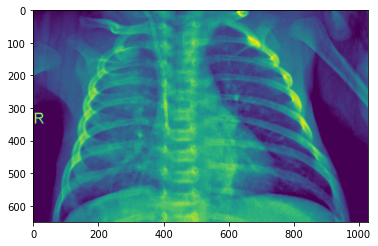

Predicted Class :  PNEUMONIA


In [6]:
import numpy as np
from google.colab import files
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150), color_mode='grayscale' )
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  cls = model.predict(images)
  cls = np.round(cls.ravel())
  print('\n\n')
  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()
  print('Predicted Class : ',labels[int(cls[0])])